<a href="https://colab.research.google.com/github/shahnbej/pytorch/blob/main/PyTorch_Moths_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'moths-image-datasetclassification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2439824%2F4128992%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240606%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240606T174457Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D987078720ac08143fd546ce7676af75b19c3145d503b70309f5d07622ee986d950551b49bee1901a98423dc67276eba59e0324bb0c21b784271d873b56b55e1f6cebe8bda6ba66c3c712e0162bdb20ad2aaf68bb230053878011b1ea708da60013589658962a01946da8f3823921a6421838556a5197ac8b1dddd1d90fb08c97b50dc822138ce6d952bed33275be580b9c8d5537c0e6617f47c823cf4ff292d3ccbe6e43aae3c08aaa63a55ff13efeee903f5926b3c266492446483f029954c9baba1d5006246fad3200203419e2469b93e685bbcaf6334eb2ebb9e1b51aa710c0c3b41e09be87cad4c5dfeddac6fd86f5986753a5da8939b6dfaf91b9e25ada'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 309108264 bytes downloaded
Downloaded and uncompressed: moths-image-datasetclassification
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/108.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/131.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/074.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/080.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/061.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/101.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/043.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/067.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/025.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/070.jpg
/kaggle/input/moths-image-datasetclassification/train/BIRD CHERRY ERMINE MOTH/111.jpg
/ka

In [4]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Total 4056 (delta 0), reused 0 (delta 0), pack-reused 4056
Receiving objects: 100% (4056/4056), 646.90 MiB | 39.16 MiB/s, done.
Resolving deltas: 100% (2371/2371), done.
Updating files: 100% (248/248), done.


In [5]:
import torch
from torch import nn
import requests
import zipfile
from pathlib import Path
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from typing import Tuple, Dict, List

In [6]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
# Create a list with the filepaths for training and testing
trainpath = Path('../input/moths-image-datasetclassification/train')
trainfilepaths = list(trainpath.glob(r'**/*.jpg'))

testpath = Path('../input/moths-image-datasetclassification/test')
testfilepaths = list(testpath.glob(r'**/*.jpg'))

valpath = Path('../input/moths-image-datasetclassification/valid')
valfilepaths = list(testpath.glob(r'**/*.jpg'))

In [8]:
trainpath, trainfilepaths[0], testfilepaths[0]

(PosixPath('../input/moths-image-datasetclassification/train'),
 PosixPath('../input/moths-image-datasetclassification/train/PALPITA VITREALIS MOTH/045.jpg'),
 PosixPath('../input/moths-image-datasetclassification/test/PALPITA VITREALIS MOTH/2.jpg'))

In [9]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
        dir_path (str or pathlib.Path): targert directory

    Return:
        A print out of :
        numbers of subdirectories in dir_path
        number of images(files) in each subdirectory
        name of each subdirectory
    """
    for dirpaths, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirpaths)} directories and {len(filenames)} images in '{dirpaths}'.")

In [10]:
walk_through_dir(trainpath)

There are 48 directories and 0 images in '../input/moths-image-datasetclassification/train'.
There are 71 directories and 174 images in '../input/moths-image-datasetclassification/train/PALPITA VITREALIS MOTH'.
There are 69 directories and 140 images in '../input/moths-image-datasetclassification/train/ARCIGERA FLOWER MOTH'.
There are 63 directories and 122 images in '../input/moths-image-datasetclassification/train/CLEARWING MOTH'.
There are 59 directories and 105 images in '../input/moths-image-datasetclassification/train/COMET MOTH'.
There are 66 directories and 131 images in '../input/moths-image-datasetclassification/train/GARDEN TIGER MOTH'.
There are 72 directories and 146 images in '../input/moths-image-datasetclassification/train/SQUARE SPOT RUSTIC MOTH'.
There are 71 directories and 143 images in '../input/moths-image-datasetclassification/train/HUMMING BIRD HAWK MOTH'.
There are 68 directories and 149 images in '../input/moths-image-datasetclassification/train/SWALLOW TAILED

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
import random

In [12]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [13]:
class_names, class_names_idx = find_classes(trainpath)
len(class_names)

50

In [14]:
from torch.utils.data import Dataset

# 1. Subclass
class ImageFolderCustom(Dataset):
    # 2. Initialize with a target_dir and tranform(optional)
    def __init__(self, targ_dir:str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob(r'**/*.jpg'))
        # set transform
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make a fn to load images
    def load_images(self, index:int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5 Overwrite the __len__() fn
    def __len__(self) -> int:
        return len(self.paths)

    # 6. Overwrite the __getitem__ fn

    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        " Return one sample of data, data and label (X,y)"
        img = self.load_images(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx




In [15]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [16]:
train_data_custom = ImageFolderCustom(targ_dir=trainpath,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=testpath,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fc986769d80>,
 <__main__.ImageFolderCustom at 0x7fc98676a7d0>)

In [17]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                         classes: List[str] = None,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    """ Take in a Dataset as well as a list of class names
    """
    # 2. Adjut display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)
    # 4. Get random sample indexes
    random_sample_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16,8))

    # 6. Loop through samples
    for i, targ_sample in enumerate(random_sample_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting
        targ_image_adjust = targ_image.permute(1,2,0)

        # Plot adjusted samples
        plt.subplot(1,n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"

        plt.title(title)

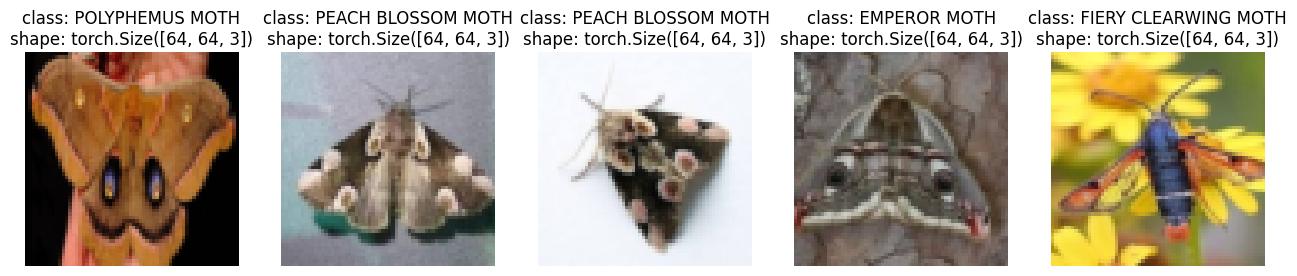

In [18]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

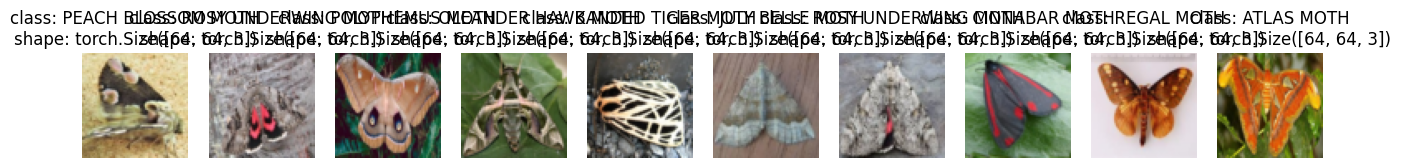

In [19]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom,
                      n=10,
                      classes=class_names,
                      seed=None)

In [20]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [21]:
# Loading and trasforming data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root= trainpath, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root= testpath, transform= simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size{BATCH_SIZE}, and {NUM_WORKERS} workers")

train_dataloader_simple = DataLoader(train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle= True,
                                    num_workers= NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                   batch_size = BATCH_SIZE,
                                   shuffle= False,
                                   num_workers = NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple



Creating DataLoader's with batch size32, and 2 workers


(<torch.utils.data.dataloader.DataLoader at 0x7fc9860b9b40>,
 <torch.utils.data.dataloader.DataLoader at 0x7fc98d7595a0>)

In [22]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [23]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [24]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=50, bias=True)
  )
)

# Create transform with data augmentation

In [25]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [26]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(trainpath, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(testpath, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 7183
     Root location: ../input/moths-image-datasetclassification/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 250
     Root location: ../input/moths-image-datasetclassification/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [27]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fc983dca980>,
 <torch.utils.data.dataloader.DataLoader at 0x7fc986427490>)

In [28]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=50, bias=True)
  )
)

In [29]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [30]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [31]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=50, bias=True)
  )
)

In [32]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.9096 | train_acc: 0.0239 | test_loss: 3.8938 | test_acc: 0.0430
Epoch: 2 | train_loss: 3.7135 | train_acc: 0.0680 | test_loss: 3.2406 | test_acc: 0.1755
Epoch: 3 | train_loss: 3.3083 | train_acc: 0.1664 | test_loss: 2.4695 | test_acc: 0.3254
Epoch: 4 | train_loss: 2.9388 | train_acc: 0.2477 | test_loss: 2.1585 | test_acc: 0.4023
Epoch: 5 | train_loss: 2.7575 | train_acc: 0.3002 | test_loss: 1.9011 | test_acc: 0.4552
Total training time: 57.802 seconds


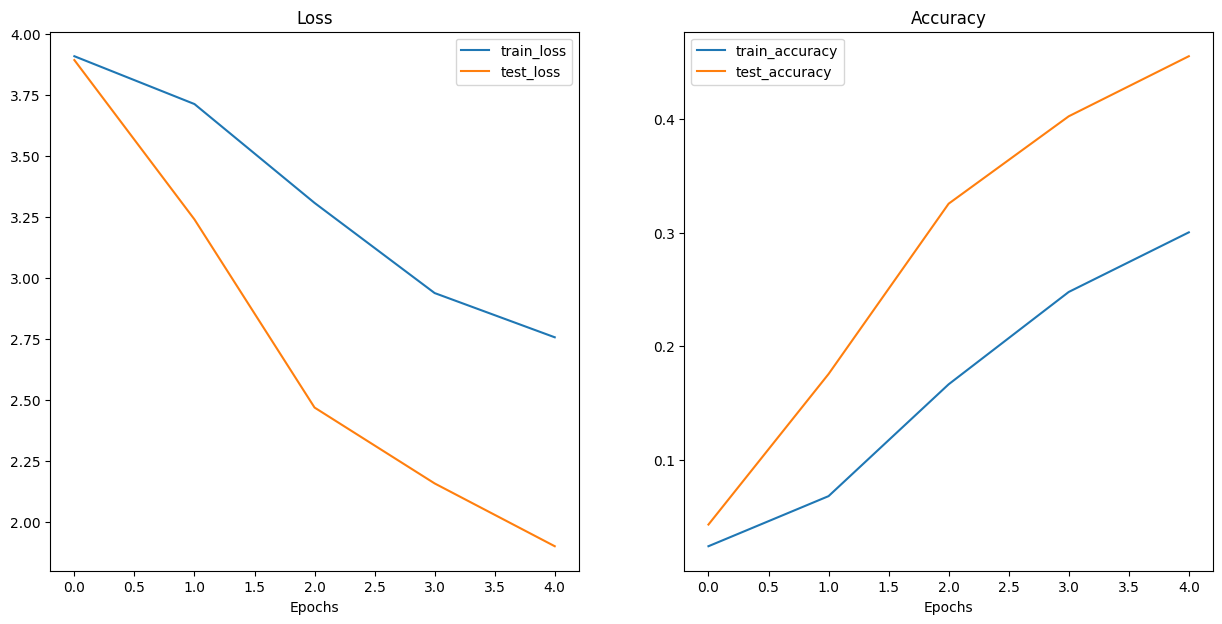

In [33]:
plot_loss_curves(model_1_results)

In [34]:
custom_image_path = Path('../input/moths-image-datasetclassification/valid')
custom_image_2 = custom_image_path.glob(r'**/2.jpg')
custom_image_2 = "../input/moths-image-datasetclassification/valid/ATLAS MOTH/2.jpg"
custom_image_2

'../input/moths-image-datasetclassification/valid/ATLAS MOTH/2.jpg'

In [35]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_2))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[ 48,  37,  46,  ...,  53,  56,  58],
         [ 54,  45,  39,  ...,  53,  55,  56],
         [ 40,  36,  37,  ...,  56,  55,  54],
         ...,
         [ 26,  26,  29,  ..., 125, 126, 128],
         [ 26,  29,  34,  ..., 127, 128, 133],
         [ 27,  32,  36,  ..., 127, 128, 135]],

        [[ 57,  46,  53,  ...,  63,  66,  68],
         [ 63,  54,  46,  ...,  63,  65,  66],
         [ 47,  43,  42,  ...,  65,  64,  63],
         ...,
         [ 40,  40,  36,  ..., 111, 112, 114],
         [ 42,  43,  41,  ..., 113, 114, 119],
         [ 45,  47,  43,  ..., 113, 114, 121]],

        [[ 26,  15,  22,  ...,  38,  41,  43],
         [ 32,  23,  15,  ...,  38,  40,  41],
         [ 16,  12,  12,  ...,  38,  37,  36],
         ...,
         [  5,   5,   3,  ...,  64,  65,  67],
         [  5,   7,   7,  ...,  66,  67,  72],
         [  5,   8,   9,  ...,  66,  67,  74]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 224, 224])

Custom image dtype

In [36]:
# # Try to make a prediction on image in uint8 format (this will error)
# model_1.eval()
# with torch.inference_mode():
#     model_1(custom_image_uint8.to(device))

In [37]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_2)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.1882, 0.1451, 0.1804,  ..., 0.2078, 0.2196, 0.2275],
         [0.2118, 0.1765, 0.1529,  ..., 0.2078, 0.2157, 0.2196],
         [0.1569, 0.1412, 0.1451,  ..., 0.2196, 0.2157, 0.2118],
         ...,
         [0.1020, 0.1020, 0.1137,  ..., 0.4902, 0.4941, 0.5020],
         [0.1020, 0.1137, 0.1333,  ..., 0.4980, 0.5020, 0.5216],
         [0.1059, 0.1255, 0.1412,  ..., 0.4980, 0.5020, 0.5294]],

        [[0.2235, 0.1804, 0.2078,  ..., 0.2471, 0.2588, 0.2667],
         [0.2471, 0.2118, 0.1804,  ..., 0.2471, 0.2549, 0.2588],
         [0.1843, 0.1686, 0.1647,  ..., 0.2549, 0.2510, 0.2471],
         ...,
         [0.1569, 0.1569, 0.1412,  ..., 0.4353, 0.4392, 0.4471],
         [0.1647, 0.1686, 0.1608,  ..., 0.4431, 0.4471, 0.4667],
         [0.1765, 0.1843, 0.1686,  ..., 0.4431, 0.4471, 0.4745]],

        [[0.1020, 0.0588, 0.0863,  ..., 0.1490, 0.1608, 0.1686],
         [0.1255, 0.0902, 0.0588,  ..., 0.1490, 0.1569, 0.1608],
         [0.0627, 0.0471, 0.0471,  ..

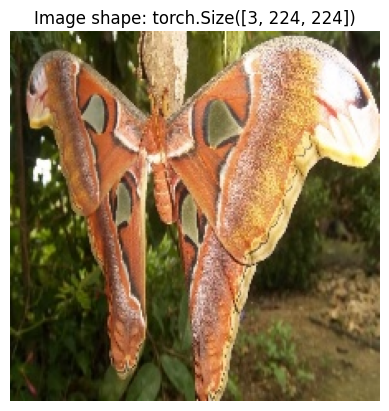

In [38]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [39]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 224, 224])
New shape: torch.Size([3, 64, 64])


In [ ]:
# model_1.eval()
# with torch.inference_mode():
#     custom_image_pred = model_1(custom_image_transformed)

In [ ]:
# model_1.eval()
# with torch.inference_mode():
#     custom_image_pred = model_1(custom_image_transformed.to(device))

In [40]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [41]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ -8.9601,  -2.9805,  -7.4428, -15.2311, -18.5248, -12.1103, -14.6131,
         -14.8180,  -7.4098,  -9.2587,  -7.5651,  -7.2795,  -6.1247,  -5.3240,
          -7.7464,  -7.5153,  -9.9654,  -6.2070,  -3.0537,  -8.3450,  -6.6453,
          -5.4917, -10.2629,  -6.3594, -15.3360, -18.5883,  -8.7147,  -8.8915,
         -11.9296, -13.4984,  -8.0043,  -7.9243, -16.5586,  -9.7460, -12.4434,
          -4.8146,  -7.2669, -13.7475,  -5.2196,  -5.6230,  -9.2043, -10.4359,
          -7.5254, -10.4435,  -9.2989, -18.0945, -12.3273, -12.0927,  -6.9527,
         -13.1356]], device='cuda:0')
Prediction probabilities: tensor([[9.2559e-04, 3.6587e-01, 4.2206e-03, 1.7497e-06, 6.4942e-08, 3.9653e-05,
         3.2459e-06, 2.6445e-06, 4.3620e-03, 6.8660e-04, 3.7346e-03, 4.9691e-03,
         1.5769e-02, 3.5117e-02, 3.1154e-03, 3.9252e-03, 3.3871e-04, 1.4523e-02,
         3.4002e-01, 1.7122e-03, 9.3689e-03, 2.9697e-02, 2.5153e-04, 1.2470e-02,
         1.5753e-06, 6.0946e-08, 1.1830e

In [42]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'ATLAS MOTH'

In [43]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

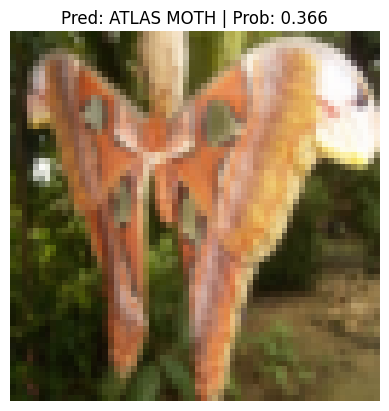

In [44]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_2,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [45]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights
model = torchvision.models.efficientnet_b0(weights=weights).to(device)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 93.8MB/s]


In [ ]:
# summary(model=model,
#         input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
#         # col_names=["input_size"], # uncomment for smaller output
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"]
# )

In [46]:
for param in model.features.parameters():
    param.requires_grad = False

In [47]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [48]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from going_modular.going_modular import engine


# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.7191 | train_acc: 0.3337 | test_loss: 1.9944 | test_acc: 0.5078
Epoch: 2 | train_loss: 1.8973 | train_acc: 0.5131 | test_loss: 1.6756 | test_acc: 0.5739
Epoch: 3 | train_loss: 1.6692 | train_acc: 0.5567 | test_loss: 1.6174 | test_acc: 0.5673
Epoch: 4 | train_loss: 1.5900 | train_acc: 0.5722 | test_loss: 1.6082 | test_acc: 0.5556
Epoch: 5 | train_loss: 1.5087 | train_acc: 0.5895 | test_loss: 1.5195 | test_acc: 0.5808
[INFO] Total training time: 54.342 seconds


# 2.1 Creating a function to make an EffNetB2 feature extractor

In [51]:
def create_effnetb2_model(num_classes:int=50, seed:int=42):
    """
    Create an EfficientNetB2 features extrator model and transfroms.

    Args:
        num_classes (int, optional): number of classesin the classifier header
        Defaults to 50
        seed(int, optional): random seed value:Default to 42.

    Returns:
        model (torch.nn.Module): EffNet feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)
    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad=False

    # Changing classifier head with random seed
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(nn.Dropout(p=0.3, inplace= True),
                                    nn.Linear(in_features=1408,out_features=num_classes)
                                    )
    return model, transforms

In [52]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=50, seed=42)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 105MB/s]


In [ ]:
# from torchinfo import summary

# # Print EffNetB2 model summary (uncomment for full output)
# summary(effnetb2,
#         input_size=(1, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 50]              --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

# 2.1 Creating DataLoaders for EffNetB2

In [53]:
from going_modular.going_modular import data_setup

train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=trainpath,
                                                                                                test_dir=testpath,
                                                                                                transform= effnetb2_transforms,
                                                                                                batch_size=32)

In [54]:
train_dataloader_effnetb2, len(class_names)

(<torch.utils.data.dataloader.DataLoader at 0x7fc981eb1d80>, 50)

# 2.3 Training EffNetB2 feature extractor

In [55]:
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=effnetb2.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

effnetb2_results = engine.train(model=effnetb2,
                               train_dataloader=train_dataloader_effnetb2,
                               test_dataloader= test_dataloader_effnetb2,
                               epochs=3,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.7218 | train_acc: 0.7357 | test_loss: 0.5444 | test_acc: 0.9513
Epoch: 2 | train_loss: 0.5875 | train_acc: 0.9041 | test_loss: 0.2976 | test_acc: 0.9639
Epoch: 3 | train_loss: 0.4214 | train_acc: 0.9168 | test_loss: 0.2124 | test_acc: 0.9678


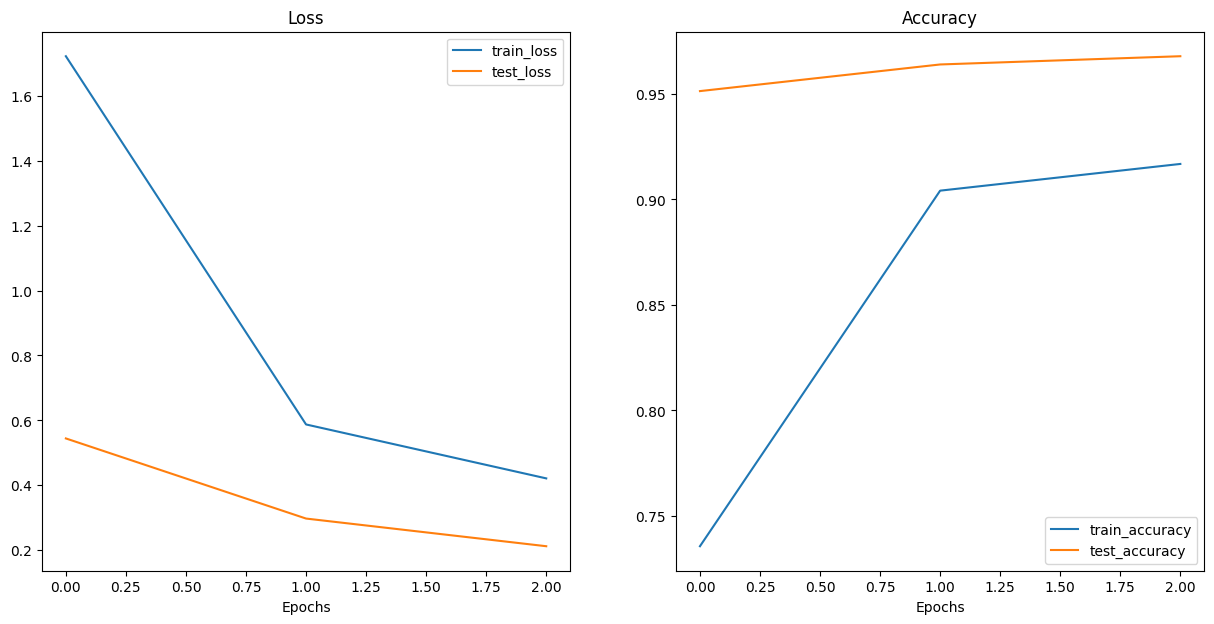

In [56]:
from helper_functions import plot_loss_curves
plot_loss_curves(effnetb2_results)

# 4.1 Gradio import and use to deploy effnetb2 model to Huggingface

In [57]:
# import and install Gradio

try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.5 MB/

# 4.2 Creating a function to map our inputs and outputs

In [58]:
# Put effnetb2 model on cpu
effnetb2.to("cpu")

next(iter(effnetb2.parameters())).device

device(type='cpu')

# 4.3 Creating a function predict for gradio's interface


In [68]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [75]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(testpath).glob(r"**/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: ../input/moths-image-datasetclassification/test/BLACK RUSTIC MOTH/5.jpg

Prediction label and probability dictionary: 
{'ARCIGERA FLOWER MOTH': 0.0007565036066807806, 'ATLAS MOTH': 2.490671249688603e-06, 'BANDED TIGER MOTH': 4.616677688318305e-05, 'BIRD CHERRY ERMINE MOTH': 0.00012156066804891452, 'BLACK RUSTIC MOTH': 0.989331841468811, 'BLAIRS MOCHA': 4.2137115087825805e-05, 'BLOTCHED EMERALD MOTH': 8.645773050375283e-06, 'BLUE BORDERED CARPET MOTH': 2.0924737327732146e-05, 'CINNABAR MOTH': 0.0005214393604546785, 'CLEARWING MOTH': 2.2963318770052865e-05, 'COMET MOTH': 2.7185431463294663e-05, 'DEATHS HEAD HAWK MOTH': 0.00033818656811490655, 'ELEPHANT HAWK MOTH': 2.131010842276737e-05, 'EMPEROR GUM MOTH': 3.563751670299098e-05, 'EMPEROR MOTH': 6.678049885522341e-06, 'EYED HAWK MOTH': 0.00016232088091783226, 'FIERY CLEARWING MOTH': 7.000949699431658e-05, 'GARDEN TIGER MOTH': 0.00013419592869468033, 'HERCULES MOTH': 2.5487159291515127e-05, 'HORNET MOTH'

In [74]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['../input/moths-image-datasetclassification/test/MAGPIE MOTH/3.jpg'],
 ['../input/moths-image-datasetclassification/test/WHITE SPOTTED SABLE MOTH/1.jpg'],
 ['../input/moths-image-datasetclassification/test/ROSY UNDERWING MOTH/2.jpg']]

# 4.4 Building Gradio's interface

In [73]:
import gradio as gr

title = " Months Classification"
description = " An EfficentNetb2 feature extracto computer vision model to classify images of Months "
article = "Created from moths image dataset"

demo = gr.Interface(fn=predict,
                    inputs= gr.Image(type='pil'),
                    outputs=[gr.Label(num_top_classes=50 , label="Predictions"),
                          gr.Number(label="Prediction time (s)")],
                   examples=example_list,
                   title=title,
                   description=description,
                   article=article)

demo.launch(debug=False,
           share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8039e1fd7b04554775.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
